#### The following are the steps that follow after we have conducted the optimization for the worst case scenarios. 
(According to assignment 9 we should try to reudce the number of policies to at most 50 and then we should reevaluate the set of solutons over 1000 scenarios using LHS)

 ### Dont forget, we should try to reduce the number of policies!! So far all solutions have been included.

In [13]:
import pickle
import pandas as pd
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt

In [11]:
experiments = pd.read_csv("intermediate outputs/second evaluation - experiments description new.csv")

outcomes_file = open("intermediate outputs/second evaluation - outcomes description new.pkl", "rb")
outcomes = pickle.load(outcomes_file)

C:\Users\ludov\anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(


In [8]:
#calculating the maximum regret 
overall_regret = {}
max_regret = {}
regret = []

for scenario in experiments.scenario.unique():
    logical = experiments.scenario==scenario
    temp_results = {k:v[logical] for k,v in outcomes.items()}
    temp_results = pd.DataFrame(temp_results)
    temp_experiments = experiments[experiments.scenario==scenario]
    
    best = temp_results.min()
    scenario_regret = temp_results - best
    scenario_regret['policy'] = temp_experiments.policy.values    
    regret.append(scenario_regret)
    
    
regret = pd.concat(regret)
maxregret = regret.groupby('policy').max()

C:\Users\ludov\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:197: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


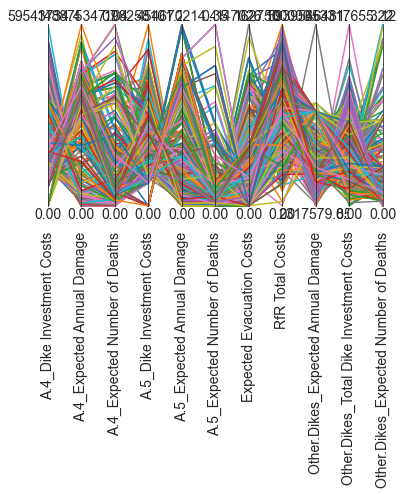

In [14]:
limits = parcoords.get_limits(maxregret)
paraxes = parcoords.ParallelAxes(maxregret)
paraxes.plot(maxregret)
plt.show()

In [ ]:
#scenario discovery 

experiments_reeval, outcomes_reeval = reeevaluation_results

y = outcomes['A.2_Expected Annual Damage'] > 6e8

# Prim only accepts up to 5000 rows
exp_short = experiments_reeval.iloc[0:4999,:]
x = exp_short
ind_pos = [i for i in range(0,4999)]
y = y[ind_pos]

prim_alg = prim.Prim(x,y, threshold=0.4)
box = prim_alg.find_box()
box.inspect_tradeoff()